In [1]:
import rdflib
from rdflib import Graph, Namespace
from rdflib.namespace import RDF, FOAF, RDFS, XSD #import already in RDFlib integrated namespaces
from rdflib import URIRef, BNode, Literal         #in case we need URIs, blank nodes, or literals

#the rest is for visualization
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

In [2]:
# Create a Graph
g = Graph()

# Parse in an RDF file hosted on the Internet
g.parse("http://www.w3.org/People/Berners-Lee/card")

# Loop through each triple in the graph (subj, pred, obj)
for subj, pred, obj in g:
    # Check if there is at least one triple in the Graph
    if (subj, pred, obj) not in g:
       raise Exception("It better be!")

# Print the number of "triples" in the Graph
print(f"Graph g has {len(g)} statements.")
# Prints: Graph g has 86 statements.

# Print out the entire Graph in the RDF Turtle format
print(g.serialize(format="turtle"))

Graph g has 86 statements.
@prefix : <http://xmlns.com/foaf/0.1/> .
@prefix Be: <https://www.w3.org/People/Berners-Lee/> .
@prefix Pub: <https://timbl.com/timbl/Public/> .
@prefix blog: <http://dig.csail.mit.edu/breadcrumbs/blog/> .
@prefix card: <https://www.w3.org/People/Berners-Lee/card#> .
@prefix cc: <http://creativecommons.org/ns#> .
@prefix cert: <http://www.w3.org/ns/auth/cert#> .
@prefix con: <http://www.w3.org/2000/10/swap/pim/contact#> .
@prefix dc: <http://purl.org/dc/elements/1.1/> .
@prefix dct: <http://purl.org/dc/terms/> .
@prefix doap: <http://usefulinc.com/ns/doap#> .
@prefix geo1: <http://www.w3.org/2003/01/geo/wgs84_pos#> .
@prefix ldp: <http://www.w3.org/ns/ldp#> .
@prefix s: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix schema1: <http://schema.org/> .
@prefix sioc: <http://rdfs.org/sioc/ns#> .
@prefix solid: <http://www.w3.org/ns/solid/terms#> .
@prefix space: <http://www.w3.org/ns/pim/space#> .
@prefix vcard: <http://www.w3.org/2006/vcard/ns#> .
@prefix w3c: 

The above example shows how a RDF graph look like. Now we will try to create a graph by ourselves. For beginners, do not confuse RDF with SPARQL. RDF is a data model, while SPARQL is a query language for RDF. We use RDF to represent data and create a graph, and use SPARQL to query the graph.

When you create a graph, you need the graph triples. A triple is a statement that has three parts: subject, predicate, and object. The subject is the resource you are describing, the predicate is the property of the resource, and the object is the value of the property. For example, "ex:John ex:age 25"; here, "ex:John" is the subject, "ex:age" is the predicate, and "25" is the object.

When we create a graph, we could either rely on existing RDF resources or create our own resources. For exmaple, [this link](https://dbpedia.org/page/67th_Academy_Awards) is a RDF resource, and we could use it to create a graph.

In [3]:
g = Graph()
# create graph using turtle
turtledata = """\
PREFIX dbr: <http://dbpedia.org/resource/>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX ex: <http://example.org/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

dbr:John_Travolta 		rdf:type   				dbo:Actor ;
      			  		dbo:awards 				dbr:67th_Academy_Awards ;
      			  		ex:portrays				dbr:Vincent_Vega .
dbr:Pulp_Fiction  		rdf:type  				dbo:Film ;
						rdfs:label				"Pulp_Fiction"@en ,
                                                "Кримінальне чтиво"@ua ;
                        dbo:genre     			dbr:Neo_noir ;
                        ex:playsIn 				dbr:Los_Angeles ;
                        ex:fictionalCharacter 	dbr:Vincent_Vega ;
                        dbo:starring  			dbr:John_Travolta ,
                        dbr:Uma_Thurman ,
                        dbr:Bruce_Willis .
dbr:Vincent_Vega 	  	rdf:type 				dbo:Fictional_character .
dbr:Quentin_Tarantino   rdf:type 				dbo:Director .
dbr:Uma_Thurman			rdf:type 				dbo:Actor ;
                        ex:portrays				dbr:Mia_Wallace ;
                        dbo:awards  			dbr:67th_Academy_Awards .
dbr:Bruce_Willis		rdf:type   				dbo:Actor .
dbr:The_Green_Mile		rdf:type  				dbo:Film ;
                        rdfs:label				"The Green Mile"@en ,
                                                "Зелена миля"@ua ;
                        dbo:starring			dbr:Tom_Hanks,
                                                dbr:David_Morse .
dbr:Tom_Hanks			rdf:type 				dbo:Actor .
dbr:David_Morse			rdf:type 				dbo:Actor .
dbr:Tenet				rdf:type  				dbo:Film ;
                        rdfs:label				"Tenet"@en ;
                        dbo:starring 			dbr:Robert_Pattinson ,
                                                dbr:Elizabeth_Debicki ,
                                                dbr:John_David_Washington .
dbr:Robert_Pattinson 	rdf:type 				dbo:Actor .
dbr:Elizabeth_Debicki   rdf:type 				dbo:Actor .
dbr:John_David_Washington  rdf:type 			dbo:Actor .
"""

g.parse(data=turtledata, format="turtle")

<Graph identifier=N9ad45a4777d54b358379584433a281a5 (<class 'rdflib.graph.Graph'>)>

In [4]:
#print all triples
for s, p, o in g:
   print((s, p, o))

(rdflib.term.URIRef('http://dbpedia.org/resource/John_Travolta'), rdflib.term.URIRef('http://example.org/portrays'), rdflib.term.URIRef('http://dbpedia.org/resource/Vincent_Vega'))
(rdflib.term.URIRef('http://dbpedia.org/resource/David_Morse'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://dbpedia.org/ontology/Actor'))
(rdflib.term.URIRef('http://dbpedia.org/resource/Uma_Thurman'), rdflib.term.URIRef('http://example.org/portrays'), rdflib.term.URIRef('http://dbpedia.org/resource/Mia_Wallace'))
(rdflib.term.URIRef('http://dbpedia.org/resource/Bruce_Willis'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://dbpedia.org/ontology/Actor'))
(rdflib.term.URIRef('http://dbpedia.org/resource/Pulp_Fiction'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'), rdflib.term.Literal('Кримінальне чтиво', lang='ua'))
(rdflib.term.URIRef('http://dbpedia.org/resource/Tenet'), rdflib.term.UR

In [6]:
#Save the graph
g.serialize(destination="data/filmgraph.ttl")

<Graph identifier=N9ad45a4777d54b358379584433a281a5 (<class 'rdflib.graph.Graph'>)>

In [7]:
print(g.serialize(format="xml"))    #print RDF/XML

<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xmlns:dbo="http://dbpedia.org/ontology/"
   xmlns:ex="http://example.org/"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#"
>
  <rdf:Description rdf:about="http://dbpedia.org/resource/John_Travolta">
    <rdf:type rdf:resource="http://dbpedia.org/ontology/Actor"/>
    <dbo:awards rdf:resource="http://dbpedia.org/resource/67th_Academy_Awards"/>
    <ex:portrays rdf:resource="http://dbpedia.org/resource/Vincent_Vega"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://dbpedia.org/resource/David_Morse">
    <rdf:type rdf:resource="http://dbpedia.org/ontology/Actor"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://dbpedia.org/resource/Uma_Thurman">
    <rdf:type rdf:resource="http://dbpedia.org/ontology/Actor"/>
    <ex:portrays rdf:resource="http://dbpedia.org/resource/Mia_Wallace"/>
    <dbo:awards rdf:resource="http://dbpedia.org/resource/67th_Academy_Awa

In [9]:
import kglab
kg = kglab.KnowledgeGraph().load_rdf("data/filmgraph.ttl")

In [10]:
measure = kglab.Measure()
measure.measure_graph(kg)
print("edges: {}\n".format(measure.get_edge_count()))
print("nodes: {}\n".format(measure.get_node_count()))

edges: 33

nodes: 21



In [15]:
#Nodes with a dbr prefix should be orange and nodes with a dbo prefix should be blue to distinguish classes and instances
VIS_STYLE = {
    "dbr": {
        "color": "orange",
        "size": 40,
    },
    "dbo":{
        "color": "blue",
        "size": 50,
    },
}

subgraph = kglab.SubgraphTensor(kg)
pyvis_graph = subgraph.build_pyvis_graph(notebook=True, style=VIS_STYLE)

In [17]:
# pyvis_graph.force_atlas_2based()
# pyvis_graph.show("data/filmgraph.html")

In [18]:
def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png))

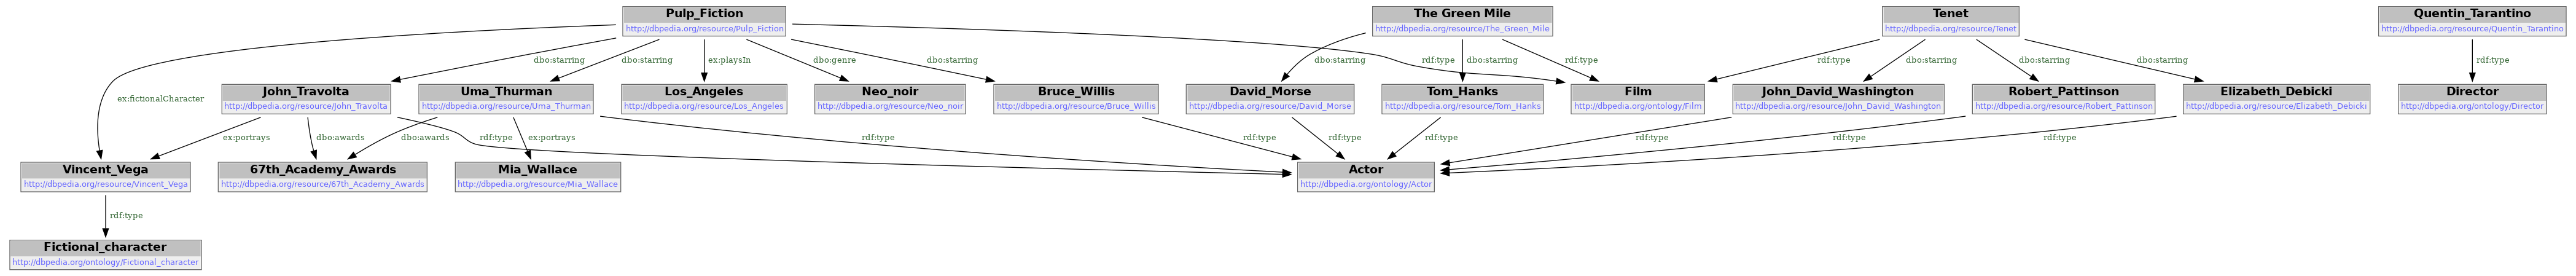

In [19]:
visualize(g)